##Install DeepC 
<img src="https://raw.githubusercontent.com/ai-techsystems/dnnCompiler/master/misc/dnnCompilerLogo.jpg" alt="DNNC" width="300"/>


In [0]:
!pip install deepC

##Import DNNC

In [0]:
import deepC.dnnc as dc

# Model

$f(w) = w^4/2 - 11*w^3/3,$

 => $df/dw = 2w^3-11w^2$

Model above has *local minima at w=11/2=5.5*

In [0]:
def f(w):
  return 1/2*w**4 - 11/3*w**3

# Gradients


In [0]:
# gradient computation
def df(w):
    return 2 * w**3 - 11 * w**2

# Plot

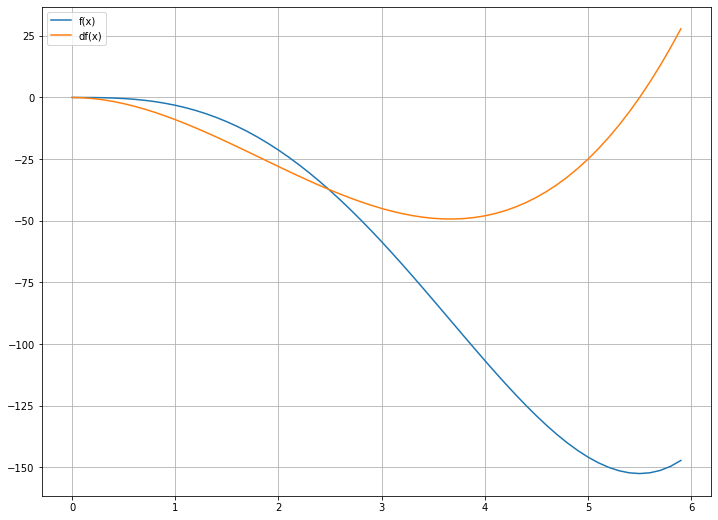

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,9))
ax = plt.axes()

x = dc.arange(60)/10;
ax.plot(list(x), list(f(x)), label="f(x)");
ax.plot(list(x), list(df(x)), label="df(x)");
ax.legend()
ax.grid(True)

# Model Parameters

**Effect of learning rage $\alpha$ on convergence speed and accuracy**


|Learning Rate $\alpha$ |  Iterations   |  final value   |   accuracy   |
|-----------------------|---------------|----------------|--------------|
|     1e-1              |   infinite    |       NA       |      NA      |
|     8e-2              |       5       |    0.0483      |      fair    |
|     1e-2              |      22       |    5.499       |  excellent   |
|     5e-2              |      44       |    5.494       |      good    |
|     1e-3              |     208       |    5.48        |      good    |
|     1e-4              |    1875       |    5.45        |      fair    |
|     5e-5              |    3633       |    5.42        |      fair    |
|     2e-5              |    8667       |    5.37        |      ok      |
|     1e-5              |     nan       |    NA          |      NA      |

---





In [0]:
# learning rate
alpha = 5e-3; # 

w      = dc.arange(2)
w_next = 0.9 * w

# Test Convergence

In [0]:
def all(result):
  for r in result:
    if ( False == r ):
      return False;
  return True;

def convergence_not_reached(step_sz):
  precision = 1e-3
  return not all(abs(step_sz) < dc.array([precision]))

# Gradient Descecnt

In [0]:
ws = []
iter   = 1
while convergence_not_reached(f(w_next)-f(w)):
    print ("iteration=", iter, " w=", w, " and w_next", w_next)
    iter += 1
    
    w      = w_next
    w_next = w - alpha * df(w)
    ws.append(w[1])

    
print("GD found minima at ", w_next, "with learning rate", alpha)

iteration= 1  w= [0.000000 1.000000]  and w_next [0.000000 0.900000]
iteration= 2  w= [0.000000 0.900000]  and w_next [0.000000 0.937260]
iteration= 3  w= [0.000000 0.937260]  and w_next [0.000000 0.977342]
iteration= 4  w= [0.000000 0.977342]  and w_next [0.000000 1.020542]
iteration= 5  w= [0.000000 1.020542]  and w_next [0.000000 1.067196]
iteration= 6  w= [0.000000 1.067196]  and w_next [0.000000 1.117681]
iteration= 7  w= [0.000000 1.117681]  and w_next [0.000000 1.172426]
iteration= 8  w= [0.000000 1.172426]  and w_next [0.000000 1.231912]
iteration= 9  w= [0.000000 1.231912]  and w_next [0.000000 1.296685]
iteration= 10  w= [0.000000 1.296685]  and w_next [0.000000 1.367359]
iteration= 11  w= [0.000000 1.367359]  and w_next [0.000000 1.444625]
iteration= 12  w= [0.000000 1.444625]  and w_next [0.000000 1.529259]
iteration= 13  w= [0.000000 1.529259]  and w_next [0.000000 1.622120]
iteration= 14  w= [0.000000 1.622120]  and w_next [0.000000 1.724157]
iteration= 15  w= [0.000000 1

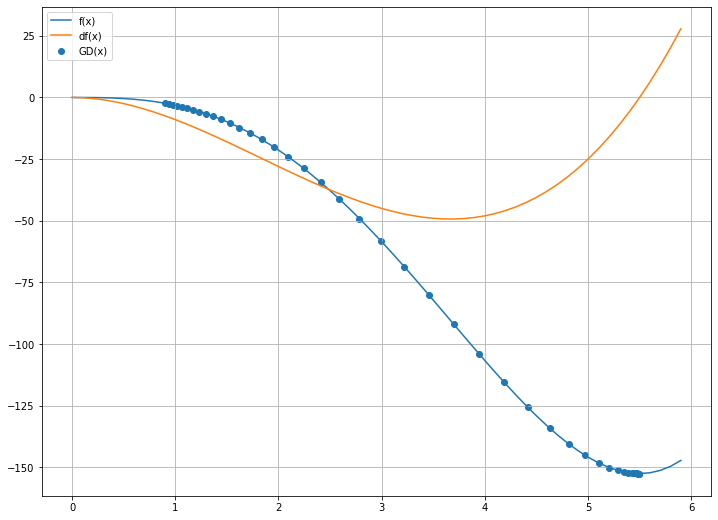

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,9))
ax = plt.axes()

tws=dc.array(ws)
x = dc.arange(60)/10;
ax.scatter(ws, f(tws.numpy()), label="GD(x)");
ax.plot(list(x), list(f(x)), label="f(x)");
ax.plot(list(x), list(df(x)), label="df(x)");
ax.legend()
ax.grid(True)